In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

print("Environment Ready.")

Environment Ready.


In [41]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train Dataset Shape: {x_train.shape}") # 60,000 images
print(f"Test Dataset Shape:  {x_test.shape}")  # 10,000 images

Train Dataset Shape: (60000, 28, 28)
Test Dataset Shape:  (10000, 28, 28)


In [43]:
# Convert 0-255 range to 0.0-1.0 float range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include the color channel (grayscale = 1)
# This turns (10000, 28, 28) into (10000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Preprocessing complete: Data normalized and reshaped.")

Preprocessing complete: Data normalized and reshaped.


In [45]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Final Decision
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.summary()

C:\Users\MattR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,426 (3.33 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                 patience=2, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

print("Starting Optimized Training...")
model.fit(datagen.flow(x_train, y_train, batch_size=64), 
          epochs=20, 
          validation_data=(x_test, y_test),
          callbacks=[lr_reduction])

Starting Optimized Training...
Epoch 1/35


C:\Users\MattR\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 100ms/step - accuracy: 0.9190 - loss: 0.2621 - val_accuracy: 0.9881 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 2/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 108ms/step - accuracy: 0.9700 - loss: 0.0970 - val_accuracy: 0.9909 - val_loss: 0.0277 - learning_rate: 0.0010
Epoch 3/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 101ms/step - accuracy: 0.9764 - loss: 0.0777 - val_accuracy: 0.9907 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 4/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 100ms/step - accuracy: 0.9800 - loss: 0.0643 - val_accuracy: 0.9920 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 5/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.9819 - loss: 0.0601 - val_accuracy: 0.9940 - val_loss: 0.0159 - learning_rate: 0.0010
Epoch 6/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 100ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.9926 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 7/35
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9843 - loss:

In [49]:
# Evaluate on the 10,000 test images
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Recognition Accuracy (Success Rate): {test_acc * 100:.2f}%")
print(f"Target Check (>90%): {'PASSED' if test_acc >= 0.9 else 'FAILED'}")

Recognition Accuracy (Success Rate): 99.71%
Target Check (>90%): PASSED


In [51]:
# Simulate 100 individual inferences
start_time = time.time()
for i in range(100):
    # Predict images one by one to simulate real-time user drawing
    model.predict(x_test[i:i+1], verbose=0)
end_time = time.time()

avg_latency = ((end_time - start_time) / 100) * 1000 # convert to ms
print(f"Average Inference Latency (Simulation): {avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if avg_latency < 50 else 'FAILED'}")

Average Inference Latency (Simulation): 91.12 ms
Goal Check (<50ms): FAILED


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


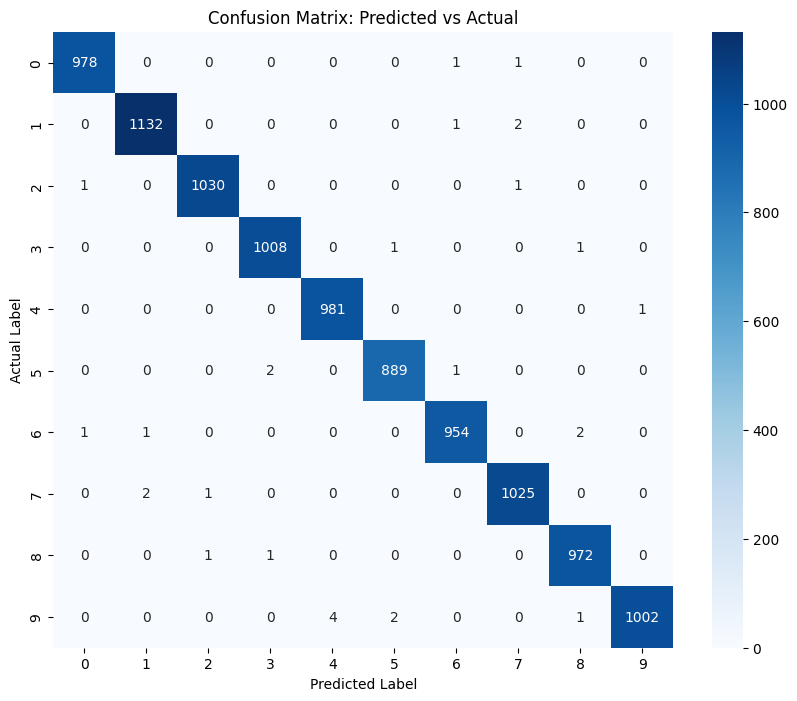

In [53]:
# Get predictions for all test images
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Generate Matrix
cm = confusion_matrix(y_test, pred_labels)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save file to directory
with open('handwritelogic.tflite', 'wb') as f:
    f.write(tflite_model)

print("Success: handwritelogic.tflite exported.")

INFO:tensorflow:Assets written to: C:\Users\MattR\AppData\Local\Temp\tmp2a2l0dde\assets


INFO:tensorflow:Assets written to: C:\Users\MattR\AppData\Local\Temp\tmp2a2l0dde\assets


Saved artifact at 'C:\Users\MattR\AppData\Local\Temp\tmp2a2l0dde'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2299231104720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231103568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231103184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231102224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231102416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231102992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231102608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231103376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231103952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2299231099728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  229

In [57]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="handwritelogic.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test latency with 100 samples
print("Starting TFLite latency test...")
start_time = time.time()
for i in range(100):
    # Prepare the input data (ensure it is float32)
    input_data = x_test[i:i+1].astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Run the optimized inference
    interpreter.invoke()
    
    # Get result (optional, but ensures the operation completes)
    output_data = interpreter.get_tensor(output_details[0]['index'])

end_time = time.time()
real_avg_latency = ((end_time - start_time) / 100) * 1000

print(f"Real TFLite Latency (Optimized): {real_avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if real_avg_latency < 50 else 'FAILED'}")

Starting TFLite latency test...
Real TFLite Latency (Optimized): 0.12 ms
Goal Check (<50ms): PASSED


C:\Users\MattR\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
